In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

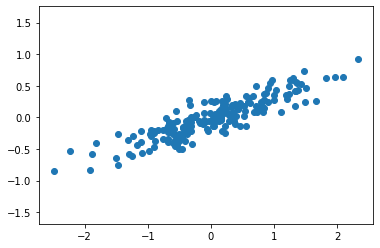

In [11]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

graph.scatter(X[:, 0], X[:, 1])
graph.axis('equal')
graph.show()

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or graph.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

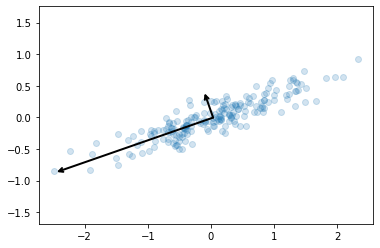

In [16]:
graph.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
graph.axis('equal')
graph.show()

# PCA as dimensionality reduction

In [17]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


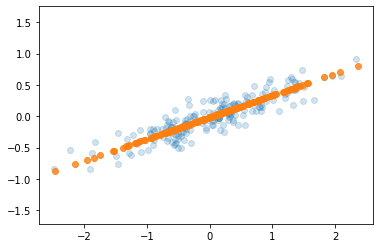

In [18]:
X_new = pca.inverse_transform(X_pca)

graph.scatter(X[:, 0], X[:, 1], alpha=0.2)
graph.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
graph.axis('equal')
graph.show()

# PCA for visualization: Hand-written digits

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 2)


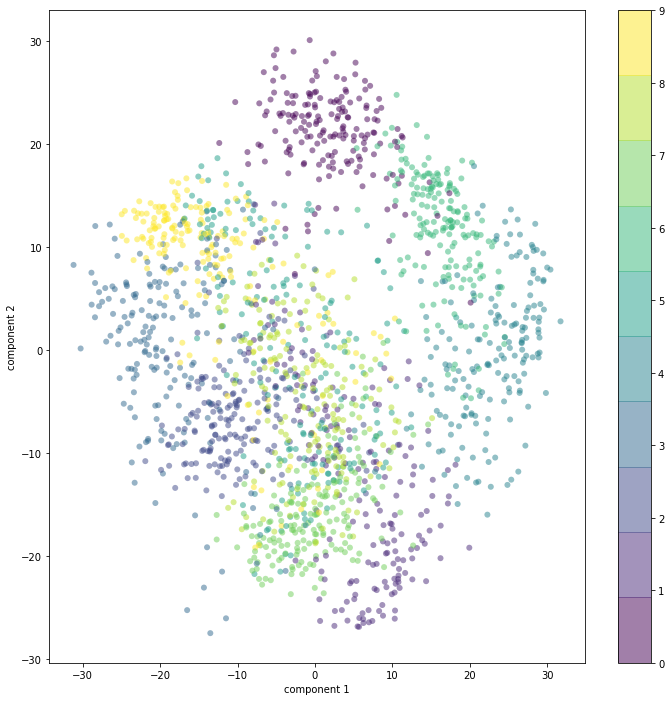

In [26]:
graph.figure(figsize=(12,12))
graph.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=graph.cm.get_cmap('viridis', 10))
graph.xlabel('component 1')
graph.ylabel('component 2')
graph.colorbar()

# Choosing the number of components

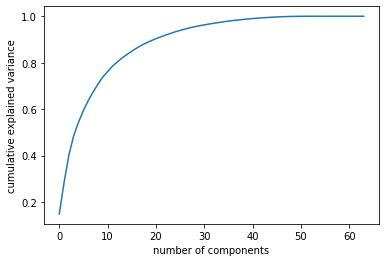

In [27]:
pca = PCA().fit(digits.data)

graph.plot(np.cumsum(pca.explained_variance_ratio_))
graph.xlabel('number of components')
graph.ylabel('cumulative explained variance')
graph.show()

# PCA as noise filtering

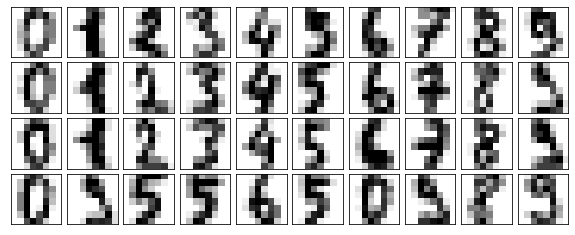

In [28]:
def plot_digits(data):
    fig, axes = graph.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

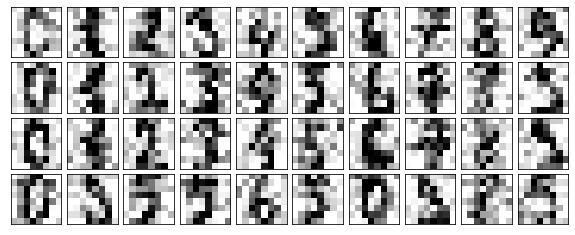

In [29]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [30]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

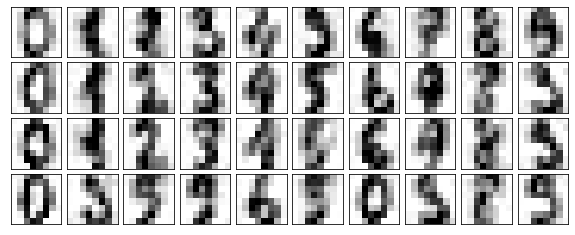

In [31]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Example Eigenfaces

In [32]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [38]:
from sklearn.decomposition import PCA

pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

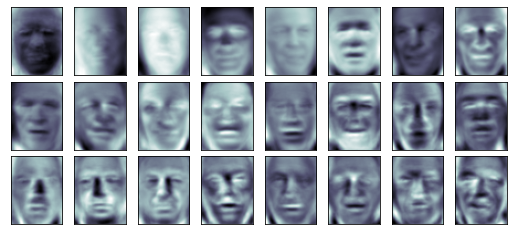

In [39]:
fig, axes = graph.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

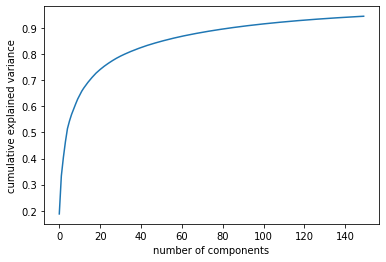

In [40]:
graph.plot(np.cumsum(pca.explained_variance_ratio_))
graph.xlabel('number of components')
graph.ylabel('cumulative explained variance')

In [43]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

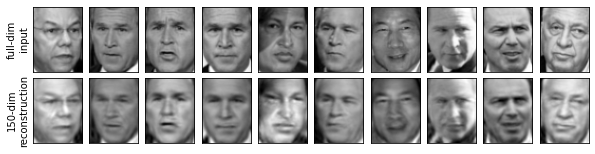

In [44]:
# Plot the results
fig, ax = graph.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')